# Assignment 3, Question 2, ISCO630E 
### Submitted by Bhanu Bhandari (IEC2016027)
#### Logistic Regression to predict the passing or failure of components based on two quality tests



In [63]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [64]:
input_1 = pd.read_csv('/Users/bhanubhandari/Desktop/GCN_3/data_quality.csv')

In [65]:
input_1

,parameter1,parameter2,result
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


In [66]:
X = input_1[["parameter1","parameter2"]]

In [67]:
X

,parameter1,parameter2
0,0.051267,0.699560
1,-0.092742,0.684940
2,-0.213710,0.692250
3,-0.375000,0.502190
4,-0.513250,0.465640
5,-0.524770,0.209800
6,-0.398040,0.034357
7,-0.305880,-0.192250
8,0.016705,-0.404240
9,0.131910,-0.513890


In [68]:
X = X.values

In [69]:
type(X)

numpy.ndarray

In [70]:
Y = input_1["result"]

In [71]:
Y = Y.values

Now, we shall visualise the entire dataset in order to observe the tendency and distribution of the data.

(118, 2) (118,)


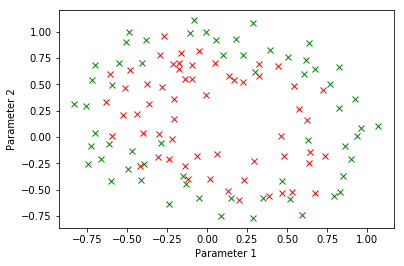

In [72]:
print(X.shape, Y.shape)
for i in range(X.shape[0]):
    if Y[i]==1:
        plt.plot(X[i,0],X[i,1],'rx')
    else:
        plt.plot(X[i,0],X[i,1],'gx')
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
plt.show()

Thus, we observe that the boundary does not resemble a linear shape. However, to start off the analysis, we use the linear hypothesis: 

## $$ y = w_0 + w_1x_1 + w_2x_2  $$

## Train-test splitting

Before we begin with the training and testing process, we first define completely random choices for the training and the testing datasets with a 70:30 split. 

In [104]:
random_val_msk = np.random.rand(len(X)) < 0.7
X_train = X[random_val_msk]
X_test = X[~random_val_msk]
Y_train = Y[random_val_msk]
Y_test = Y[~random_val_msk] 
print(X1_train.shape, X1_test.shape, Y_train.shape, Y_test.shape)

(79, 4) (39, 4) (86,) (32,)


In [105]:
X_train = (X_train-np.min(X_train,axis=0))/(np.max(X_train,axis=0)-np.min(X_train,axis=0))
X_test = (X_test-np.min(X_test,axis=0))/(np.max(X_test,axis=0)-np.min(X_test,axis=0))
print(X_train, X_test)

[[0.43267994 0.78039935]
 [0.35255386 0.77255609]
 [0.28524771 0.77647772]
 [0.11217506 0.51765539]
 [0.18268717 0.42353462]
 [0.41344977 0.18823832]
 [0.47754941 0.12941385]
 [0.69870026 0.12549222]
 [0.75959227 0.27451422]
 [0.81408017 0.30588728]
 [0.70831479 0.66667203]
 [0.58331479 0.71765324]
 [0.49677847 0.69412345]
 [0.37819427 0.84314546]
 [0.30768161 0.78039935]
 [0.13781381 0.74510467]
 [0.06730726 0.72549651]
 [0.07371695 0.40784809]
 [0.1698678  0.25882769]
 [0.3397356  0.19215996]
 [0.51601309 0.08235427]
 [0.32691623 0.69804509]
 [0.24037991 0.8235373 ]
 [0.25640412 0.92157809]
 [0.30768161 0.75294793]
 [0.24678959 0.65882877]
 [0.20191623 0.57255287]
 [0.36857919 0.30588728]
 [0.43909018 0.31765217]
 [0.5320373  0.18431669]
 [0.56729057 0.28235749]
 [0.67305595 0.30588728]
 [0.76280268 0.32941707]
 [0.52883246 0.68628019]
 [0.65062205 0.76471282]
 [0.58331479 0.77647772]
 [0.48075425 0.71373161]
 [0.40062962 0.61961245]
 [0.35255386 0.70196672]
 [0.28845255 0.59608266]


Now, we must add the term for ensuring the bias term in the hypothesis, and we add this to both the training and the testing subsets.

In [106]:
# Adding row for bias term w0 in the hypothesis to the entire dataset 
X_train = np.concatenate( (np.ones((X_train.shape[0],1)),X_train) , axis=1)
X_test = np.concatenate( (np.ones((X_test.shape[0],1)),X_test) , axis=1)
print(X_train.shape)

(86, 3)


We now visualise the training set again after normalisation. 

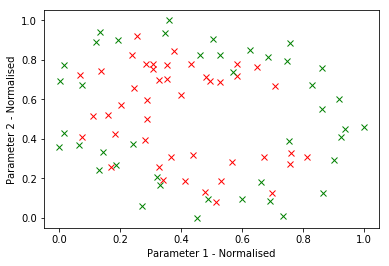

In [107]:
for i in range(X_train.shape[0]):
    if Y_train[i]==1:
        plt.plot(X_train[i,1],X_train[i,2],'rx')
    else:
        plt.plot(X_train[i,1],X_train[i,2],'gx')
plt.xlabel('Parameter 1 - Normalised')
plt.ylabel('Parameter 2 - Normalised')
plt.show()

Clearly, the data is not very linearly separated in this case. (Green for pass, Red for fail). However, we begin with a linear decision boundary of the form: 
## $$ y = w_0 + w_1x_1 + w_2x_2 $$

## Defining the Sigmoid Function
Before we proceed with **training**, we must declare our sigmoid and sigmoid derivative functions, to be used later in the training process. We define the sigmoid function as: 

## $$ g(x) = 1/(1 + e^{-x}) $$

In [108]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

We now intialise the weights randomly. 

In [109]:
m,n = X_train.shape # n is the shape of original_X.shape[0]+1
weights = np.random.rand(1,n)
print(weights)
h = sigmoid(X_train@weights.T)
h = h.reshape(-1)
print(h.shape)

[[0.46211306 0.46159024 0.66240971]]
(86,)


In [110]:
def gradient_descent(X,Y,theta,alpha,lambda1,iterations):
    i=0
    while(i<iterations):
        sigmoid_output = sigmoid(X@theta.T).reshape(-1)
        theta = theta - (alpha/m)*(X.T@(sigmoid_output-Y)) - (lambda1/m)*np.sum(theta[:,1:])
        i+=1
    return theta

In [111]:
alphas = [0.0001, 0.0005, 0.0010, 0.050, 0.0100, 0.100, 0.150] 
epochs = 100000

for alpha in alphas:
    theta_x = gradient_descent(X_train,Y_train,weights,alpha,0,epochs) 
    h = sigmoid(X_test@theta_x.T)
    h = ((h>=0.5)*1).reshape(-1)
    accuracy = (np.sum(h==Y_test)/Y_test.shape[0])*100
    print("Learning rate value = " + str(alpha) + ", Accuracy % = " + str(accuracy))


Learning rate value = 0.0001, Accuracy % = 56.25
Learning rate value = 0.0005, Accuracy % = 43.75
Learning rate value = 0.001, Accuracy % = 46.875
Learning rate value = 0.05, Accuracy % = 46.875
Learning rate value = 0.01, Accuracy % = 46.875
Learning rate value = 0.1, Accuracy % = 46.875
Learning rate value = 0.15, Accuracy % = 46.875


In [112]:
alphas = [0.0001, 0.0005, 0.0010, 0.050, 0.0100, 0.100, 0.150] 
lambdas = [0,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,20]
epochs = 100000

for lambda1 in lambdas:
    print("Lambda = " + str(lambda1))
    for alpha in alphas:
        theta_x = gradient_descent(X_train,Y_train,weights,alpha,lambda1,epochs)
        hypothesis = sigmoid(X_test@theta_x.T)
        hypothesis = (hypothesis>=0.5)*1
        hypothesis = hypothesis.reshape(-1)
        truth = h==Y_test
        acc = (np.sum(truth)/Y_test.shape[0])*100
        print("Learning rate value: " + str(alpha) + ", Accuracy % = " + str(acc))
    print("End of iteration \n")

Lambda = 0
Learning rate value: 0.0001, Accuracy % = 46.875
Learning rate value: 0.0005, Accuracy % = 46.875
Learning rate value: 0.001, Accuracy % = 46.875
Learning rate value: 0.05, Accuracy % = 46.875
Learning rate value: 0.01, Accuracy % = 46.875
Learning rate value: 0.1, Accuracy % = 46.875
Learning rate value: 0.15, Accuracy % = 46.875
End of iteration 

Lambda = 0.001
Learning rate value: 0.0001, Accuracy % = 46.875
Learning rate value: 0.0005, Accuracy % = 46.875
Learning rate value: 0.001, Accuracy % = 46.875
Learning rate value: 0.05, Accuracy % = 46.875
Learning rate value: 0.01, Accuracy % = 46.875
Learning rate value: 0.1, Accuracy % = 46.875
Learning rate value: 0.15, Accuracy % = 46.875
End of iteration 

Lambda = 0.005
Learning rate value: 0.0001, Accuracy % = 46.875
Learning rate value: 0.0005, Accuracy % = 46.875
Learning rate value: 0.001, Accuracy % = 46.875
Learning rate value: 0.05, Accuracy % = 46.875
Learning rate value: 0.01, Accuracy % = 46.875
Learning rate v

This indicates that a linear hypothesis is not able to predict satisfactorily for features as are present in this dataset. We are getting a mediocre accuracy, even after regularisation. 

Hence, we need to extract higher order features as well. We now use the circular boundary hypothesis instead of a linear one: 
## $$ y = w_0 + w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2 $$ 
And in order to achieve this, we need to append these higher order features to the original training inputs, and hence modify the training and testing sets. We also run the above analysis on these higher order features. 

In [83]:
X1 = input_1[["parameter1","parameter2"]]

In [84]:
X1["parameter3"] = input_1[["parameter1"]]**2

In [85]:
X1["parameter4"] = input_1[["parameter2"]]**2

In [86]:
X1

,parameter1,parameter2,parameter3,parameter4
0,0.051267,0.699560,0.002628,0.489384
1,-0.092742,0.684940,0.008601,0.469143
2,-0.213710,0.692250,0.045672,0.479210
3,-0.375000,0.502190,0.140625,0.252195
4,-0.513250,0.465640,0.263426,0.216821
5,-0.524770,0.209800,0.275384,0.044016
6,-0.398040,0.034357,0.158436,0.001180
7,-0.305880,-0.192250,0.093563,0.036960
8,0.016705,-0.404240,0.000279,0.163410
9,0.131910,-0.513890,0.017400,0.264083


In [98]:
random_val_msk = np.random.rand(len(X)) < 0.7
X1_train = X1[random_val_msk]
X1_test = X1[~random_val_msk]
Y_train = Y[random_val_msk]
Y_test = Y[~random_val_msk] 
print(X1_train.shape, X1_test.shape, Y_train.shape, Y_test.shape)

m1,n1 = X1_train.shape # n is the shape of original_X.shape[0]+1
weights_1 = np.random.rand(1,n1)
print(weights_1)
hyp_1 = sigmoid(X1_train@weights_1.T)
hyp_1 = hyp_1.reshape(-1)
print(h.shape)

(79, 4) (39, 4) (79,) (39,)
[[0.86173203 0.23524639 0.36278579 0.97391774]]
(36,)


In [99]:
alphas = [0.00005, 0.00006, 0.00007, 0.0001, 0.0002, 0.0003, 0.0005, 0.0010, 0.050, 0.0100, 0.100, 0.150] 
epochs = 100000

for alpha in alphas:
    theta1_x = gradient_descent(X1_train,Y_train,weights_1,alpha,0,epochs) 
    hyp = sigmoid(X1_test@theta1_x.T)
    hyp = ((hyp>=0.5)*1).reshape(-1)
    accuracy = (np.sum(hyp==Y_test)/Y_test.shape[0])*100
    print("Learning rate value = " + str(alpha) + ", Accuracy % = " + str(accuracy))

Learning rate value = 5e-05, Accuracy % = 46.15384615384615
Learning rate value = 6e-05, Accuracy % = 43.58974358974359
Learning rate value = 7e-05, Accuracy % = 43.58974358974359
Learning rate value = 0.0001, Accuracy % = 46.15384615384615
Learning rate value = 0.0002, Accuracy % = 61.53846153846154
Learning rate value = 0.0003, Accuracy % = 64.1025641025641
Learning rate value = 0.0005, Accuracy % = 71.7948717948718
Learning rate value = 0.001, Accuracy % = 71.7948717948718
Learning rate value = 0.05, Accuracy % = 74.35897435897436
Learning rate value = 0.01, Accuracy % = 74.35897435897436
Learning rate value = 0.1, Accuracy % = 74.35897435897436
Learning rate value = 0.15, Accuracy % = 74.35897435897436


In [103]:
alphas = [0.00005, 0.00006, 0.00007, 0.0001, 0.0002, 0.0003, 0.0005, 0.0010, 0.050, 0.0100, 0.100, 0.150] 
lambdas = [0,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,20]
epochs = 100000

for lambda1 in lambdas:
    print("Lambda = " + str(lambda1))
    for alpha in alphas:
        theta1_x = gradient_descent(X1_train,Y_train,weights_1,alpha,lambda1,epochs)
        hypothesis = sigmoid(X1_test@theta1_x.T)
        hypothesis = (hypothesis>=0.5)*1
        hypothesis = hypothesis.reshape(-1)
        acc = (np.sum(hypothesis==Y_test)/Y_test.shape[0])*100
        print("Learning rate value: " + str(alpha) + ", Accuracy % = " + str(acc))
    print("End of iteration \n")

Lambda = 0
Learning rate value: 5e-05, Accuracy % = 46.15384615384615
Learning rate value: 6e-05, Accuracy % = 43.58974358974359
Learning rate value: 7e-05, Accuracy % = 43.58974358974359
Learning rate value: 0.0001, Accuracy % = 46.15384615384615
Learning rate value: 0.0002, Accuracy % = 61.53846153846154
Learning rate value: 0.0003, Accuracy % = 64.1025641025641
Learning rate value: 0.0005, Accuracy % = 71.7948717948718
Learning rate value: 0.001, Accuracy % = 71.7948717948718
Learning rate value: 0.05, Accuracy % = 74.35897435897436
Learning rate value: 0.01, Accuracy % = 74.35897435897436
Learning rate value: 0.1, Accuracy % = 74.35897435897436
Learning rate value: 0.15, Accuracy % = 74.35897435897436
End of iteration 

Lambda = 0.001
Learning rate value: 5e-05, Accuracy % = 48.717948717948715
Learning rate value: 6e-05, Accuracy % = 51.28205128205128
Learning rate value: 7e-05, Accuracy % = 51.28205128205128
Learning rate value: 0.0001, Accuracy % = 56.41025641025641
Learning rate

# CONCLUSION

Hence, we conclude that after changing the hypothesis, our accuracy is certainly much higher than what we were getting from a simple linear hypothesis (for particular values of regularisation parameter lambda and the learning rate). Since the boundary is not perfectly circular as well, we have to introduce some more advanced features into the hypothesis, and even perhaps some non linear ones. There is definitely scope for improvement, but we are getting an acceptable accuracy of around 75% with the assumption of a circular boundary for the hypothesis.  